In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from src.dataset import LungCTDataset

In [3]:
series_dir = Path("../data/raw/LIDC-IDRI-0001")
dataset = LungCTDataset(series_dir)

print("Number of slices:", len(dataset))
print("Voxel spacing (z, y, x):", dataset.voxel_spacing)

Number of slices: 413
Voxel spacing (z, y, x): (2.0, 0.8046875, 0.8046875)


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

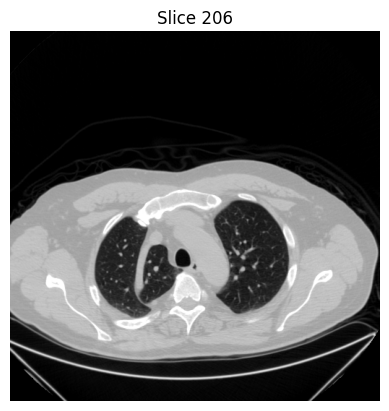

In [4]:
idx = len(dataset)//2
img = dataset.get_slice(idx)

plt.Figure(figsize=(5, 5))
plt.imshow(img, cmap='grey')
plt.title(f"Slice {idx}")
plt.axis("off")

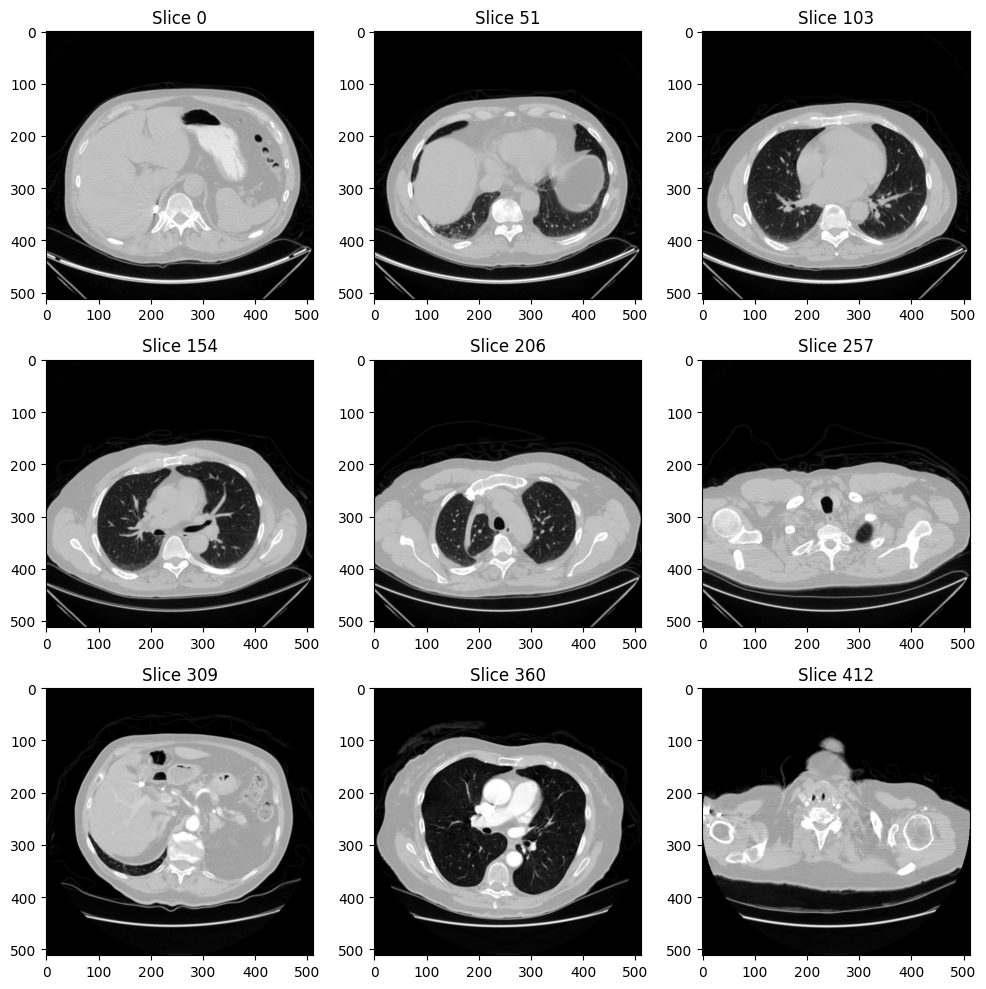

In [5]:
indices = np.linspace(0, len(dataset)-1, 9, dtype=int)
plt.figure(figsize=(10, 10))

for i, idx in enumerate(indices):
    plt.subplot(3, 3, i+1)
    plt.imshow(dataset.get_slice(idx), cmap="grey")
    plt.title(f"Slice {idx}")
    plt.axis()

plt.tight_layout()
plt.show()

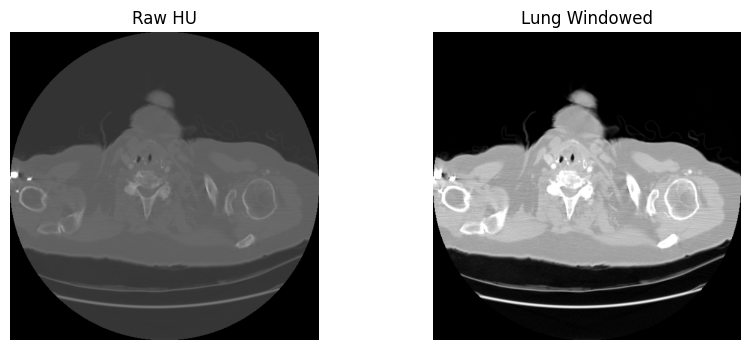

In [6]:
raw_slice = dataset.volume[idx]

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(raw_slice, cmap="gray")
plt.title("Raw HU")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(dataset.get_slice(idx), cmap="gray")
plt.title("Lung Windowed")
plt.axis("off")

plt.show()



In [7]:
ns = {
    "lidc": "http://www.nih.gov"
}

In [8]:
import xml.etree.ElementTree as ET
from pathlib import Path

xml_path = Path("../data/annotations/001.xml")
tree = ET.parse(xml_path)
root = tree.getroot()

print("Root tag:", root.tag)
print("Number of children:", len(root))

Root tag: {http://www.nih.gov}LidcReadMessage
Number of children: 5


In [9]:
reading_sessions = root.findall(".//lidc:readingSession", ns)
print("Number of reading sessions (radiologists):", len(reading_sessions))

Number of reading sessions (radiologists): 4


In [10]:
session = reading_sessions[0]

nodules = session.findall(".//lidc:unblindedReadNodule", ns)
print("Nodules (>= 3mm) in first session:", len(nodules))

Nodules (>= 3mm) in first session: 5


In [11]:
nodule = nodules[0]
rois = nodule.findall(".//lidc:roi", ns)
print("Number of slices for this nodule:", len(rois))

Number of slices for this nodule: 1


In [12]:
roi = rois[0]

z_pos = roi.find("lidc:imageZposition", ns).text
edges = roi.findall(".//lidc:edgeMap", ns)

print("Slice Z position:", z_pos)
print("Contour points:", len(edges))

for e in edges[:5]:
    x = e.find("lidc:xCoord", ns).text
    y = e.find("lidc:yCoord", ns).text
    print(x, y)

Slice Z position: -578.599976
Contour points: 1
126 330


In [13]:
import xml.etree.ElementTree as ET
from pathlib import Path

xml = Path("../data/annotations/001.xml")
root = ET.parse(xml).getroot()

# print all unique tag names (without namespace noise)
tags = set()
for elem in root.iter():
    tags.add(elem.tag)

for t in sorted(tags):
    print(t)


{http://www.nih.gov}CtImageFile
{http://www.nih.gov}DateRequest
{http://www.nih.gov}DateService
{http://www.nih.gov}LidcReadMessage
{http://www.nih.gov}MessageId
{http://www.nih.gov}RequestingSite
{http://www.nih.gov}ResponseDescription
{http://www.nih.gov}ResponseHeader
{http://www.nih.gov}SeriesInstanceUid
{http://www.nih.gov}ServicingSite
{http://www.nih.gov}StudyInstanceUID
{http://www.nih.gov}TaskDescription
{http://www.nih.gov}TimeRequest
{http://www.nih.gov}TimeService
{http://www.nih.gov}Version
{http://www.nih.gov}annotationVersion
{http://www.nih.gov}calcification
{http://www.nih.gov}characteristics
{http://www.nih.gov}edgeMap
{http://www.nih.gov}imageSOP_UID
{http://www.nih.gov}imageZposition
{http://www.nih.gov}inclusion
{http://www.nih.gov}internalStructure
{http://www.nih.gov}lobulation
{http://www.nih.gov}locus
{http://www.nih.gov}malignancy
{http://www.nih.gov}margin
{http://www.nih.gov}noduleID
{http://www.nih.gov}nonNodule
{http://www.nih.gov}nonNoduleID
{http://www.n

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from src.dataset import LungCTDataset

In [15]:
patient_id = "LIDC-IDRI-0001"

series_dir = Path("../data/raw")/patient_id
mask_path = Path("../data/masks")/f"{patient_id}_mask.npy"

dataset = LungCTDataset(series_dir)

mask = np.load(mask_path)

print("CT volume shape:", dataset.volume.shape)
print("Mask volume shape:", mask.shape)

CT volume shape: (413, 512, 512)
Mask volume shape: (133, 512, 512)


In [16]:
# find slices where mask exists
slice_indices = np.where(mask.sum(axis=(1, 2)) > 0)[0]
print("Slices with mask:", slice_indices[:10])

Slices with mask: []


In [17]:
import xml.etree.ElementTree as ET
from pathlib import Path

xml = Path("../data/annotations/001.xml")
root = ET.parse(xml).getroot()

ns = {"lidc": "http://www.nih.gov"}

# Take first reading session → first nodule → first roi
session = root.findall(".//lidc:readingSession", ns)[0]
nodule = session.findall(".//lidc:unblindedReadNodule", ns)[0]
roi = nodule.findall("lidc:roi", ns)[0]

edges = roi.findall("lidc:edgeMap", ns)

print("Number of edgeMap elements in this ROI:", len(edges))

# Print first 5 points
for e in edges[:5]:
    x = e.find("lidc:xCoord", ns).text
    y = e.find("lidc:yCoord", ns).text
    print(x, y)


Number of edgeMap elements in this ROI: 1
126 330


In [18]:
import xml.etree.ElementTree as ET
from pathlib import Path

xml = Path("../data/annotations/001.xml")
root = ET.parse(xml).getroot()

ns = {"lidc": "http://www.nih.gov"}

session = root.findall(".//lidc:readingSession", ns)[0]
nodule = session.findall(".//lidc:unblindedReadNodule", ns)[0]
roi = nodule.findall("lidc:roi", ns)[0]

edges = roi.findall("lidc:edgeMap", ns)

print("Number of edgeMap elements:", len(edges))

for e in edges[:10]:
    x = e.find("lidc:xCoord", ns).text
    y = e.find("lidc:yCoord", ns).text
    print(x, y)


Number of edgeMap elements: 1
126 330


In [19]:
import json
ann = json.load(open("../data/annotations/LIDC-IDRI-0001.json"))

# find first valid slice
for n in ann["nodules"]:
    if len(n["slices"]) > 0:
        print("Contour length:", len(n["slices"][0]["contour"]))
        break


Contour length: 13


In [20]:
slice_indices = np.where(mask.sum(axis=(1,2)) > 0)[0]
print(slice_indices[:10])

[]


In [21]:
import numpy as np
from pathlib import Path

patient_id = "LIDC-IDRI-0001"
mask = np.load(Path("../data/masks") / f"{patient_id}_mask.npy")

slice_indices = np.where(mask.sum(axis=(1,2)) > 0)[0]
print("Slices with mask:", slice_indices[:10])


Slices with mask: []


In [22]:
import json

ann = json.load(open("../data/annotations/LIDC-IDRI-0001.json"))

print("Number of nodules:", len(ann["nodules"]))

for n in ann["nodules"]:
    print("Slices in nodule:", len(n["slices"]))
    if len(n["slices"]) > 0:
        print("Keys:", n["slices"][0].keys())
        break


Number of nodules: 6
Slices in nodule: 9
Keys: dict_keys(['sop_uid', 'contour'])


In [23]:
import json

ann = json.load(open("../data/annotations/LIDC-IDRI-0001.json"))

for n in ann["nodules"]:
    if len(n["slices"]) > 0:
        print(n["slices"][0].keys())
        break


dict_keys(['sop_uid', 'contour'])


In [24]:
mask = np.load("../data/masks/LIDC-IDRI-0001_mask.npy")
slice_indices = np.where(mask.sum(axis=(1,2)) > 0)[0]
print(slice_indices[:10])


[]


In [25]:
import json
import pydicom
from pathlib import Path

ann = json.load(open("../data/annotations/LIDC-IDRI-0001.json"))

series_dir = Path("../data/raw/LIDC-IDRI-0001")
dcm_files = sorted(series_dir.rglob("*.dcm"))

print("Number of DICOM files:", len(dcm_files))

ds = pydicom.dcmread(dcm_files[0])

print("Example CT SOP UID:")
print(ds.SOPInstanceUID)

for n in ann["nodules"]:
    if len(n["slices"]) > 0:
        print("\nExample JSON SOP UID:")
        print(n["slices"][0]["sop_uid"])
        break



Number of DICOM files: 413
Example CT SOP UID:
1.3.6.1.4.1.14519.5.2.1.6279.6001.262721256650280657946440242654

Example JSON SOP UID:
1.3.6.1.4.1.14519.5.2.1.6279.6001.210078393569280850892818953523


In [26]:
import xml.etree.ElementTree as ET
from pathlib import Path

xml = Path("../data/annotations/001.xml")
root = ET.parse(xml).getroot()

ns = {"lidc": "http://www.nih.gov"}

series_uid = root.find(".//lidc:SeriesInstanceUid", ns).text
study_uid = root.find(".//lidc:StudyInstanceUID", ns).text

print("XML SeriesInstanceUID:", series_uid)
print("XML StudyInstanceUID:", study_uid)


XML SeriesInstanceUID: 1.3.6.1.4.1.14519.5.2.1.6279.6001.311476128731958142981941696518
XML StudyInstanceUID: 1.3.6.1.4.1.14519.5.2.1.6279.6001.193183513859852492693631043956


In [27]:
import pydicom
from pathlib import Path

series_dir = Path("../data/raw/LIDC-IDRI-0001")
dcm_files = sorted(series_dir.rglob("*.dcm"))
ds = pydicom.dcmread(dcm_files[0])

print("CT SeriesInstanceUID:", ds.SeriesInstanceUID)
print("CT StudyInstanceUID:", ds.StudyInstanceUID)


CT SeriesInstanceUID: 1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636438705059720603192
CT StudyInstanceUID: 1.3.6.1.4.1.14519.5.2.1.6279.6001.298806137288633453246975630178


In [28]:
import xml.etree.ElementTree as ET
from pathlib import Path

xml_path = Path("../data/annotations/001.xml")
root = ET.parse(xml_path).getroot()

ns = {"lidc": "http://www.nih.gov"}

series_uid = root.find(".//lidc:SeriesInstanceUid", ns).text.strip()
study_uid = root.find(".//lidc:StudyInstanceUID", ns).text.strip()

print("SeriesInstanceUID:", series_uid)
print("StudyInstanceUID:", study_uid)


SeriesInstanceUID: 1.3.6.1.4.1.14519.5.2.1.6279.6001.311476128731958142981941696518
StudyInstanceUID: 1.3.6.1.4.1.14519.5.2.1.6279.6001.193183513859852492693631043956


In [29]:
import pydicom
from pathlib import Path

series_dir = Path("data/raw/LIDC-IDRI-0001")
dcm_files = sorted(series_dir.rglob("*.dcm"))

ds = pydicom.dcmread(dcm_files[0])
print(ds.SeriesInstanceUID)


IndexError: list index out of range

In [ ]:
from pathlib import Path

base = Path("../data/raw")

for p in base.rglob("*"):
    if p.is_dir():
        print(p)

..\data\raw\LIDC-IDRI-0001
..\data\raw\LIDC-IDRI-0005
..\data\raw\LIDC-IDRI-0001\1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636438705059720603192
..\data\raw\LIDC-IDRI-0001\1.3.6.1.4.1.14519.5.2.1.6279.6001.311476128731958142981941696518
..\data\raw\LIDC-IDRI-0005\1.3.6.1.4.1.14519.5.2.1.6279.6001.129007566048223160327836686225


In [ ]:
series_dir = Path("../data/raw/LIDC-IDRI-0001")
dcm_files = list(series_dir.rglob("*.dcm"))

print("DICOM files found:", len(dcm_files))


DICOM files found: 413


In [ ]:
series_dir = Path("../data/raw/LIDC-IDRI-0001/1.3.6.1.4.1.14519.5.2.1.6279.6001.311476128731958142981941696518")
dcm_files = list(series_dir.rglob("*.dcm"))
print(len(dcm_files))


280


In [ ]:
mask = np.load("../data/masks/LIDC-IDRI-0001_mask.npy")
slice_indices = np.where(mask.sum(axis=(1,2)) > 0)[0]
print(slice_indices[:10])

[]


In [30]:
import numpy as np

mask = np.load("../data/masks/LIDC-IDRI-0001_mask.npy")

slice_indices = np.where(mask.sum(axis=(1,2)) > 0)[0]
print("Slices with mask:", slice_indices[:10])


Slices with mask: [ 90  91  92  93  94  95  96  97  98 134]


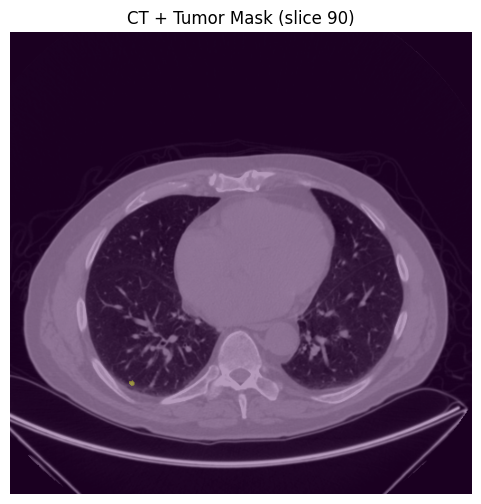

In [55]:
import matplotlib.pyplot as plt
from src.dataset import LungCTDataset
from pathlib import Path
import numpy as np

series_dir = Path(
    "../data/raw/LIDC-IDRI-0001/"
    "1.3.6.1.4.1.14519.5.2.1.6279.6001.311476128731958142981941696518"
)

dataset = LungCTDataset(series_dir)
mask = np.load("../data/masks/LIDC-IDRI-0001_mask.npy")

idx = slice_indices[0]  # pick a slice with mask

img = dataset.get_slice(idx)

plt.figure(figsize=(6,6))
plt.imshow(img, cmap="gray")
plt.imshow(mask[idx], alpha=0.4)
plt.title(f"CT + Tumor Mask (slice {idx})")
plt.axis("off")
plt.show()


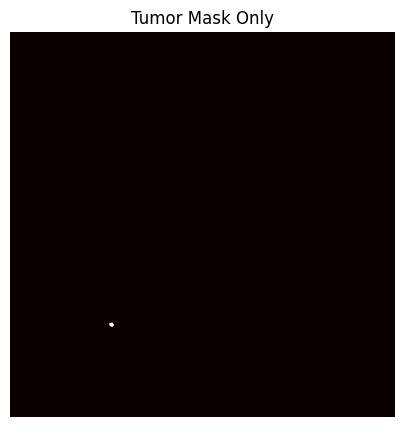

In [56]:
plt.figure(figsize=(5,5))
plt.imshow(mask[90], cmap="hot")
plt.title("Tumor Mask Only")
plt.axis("off")
plt.show()


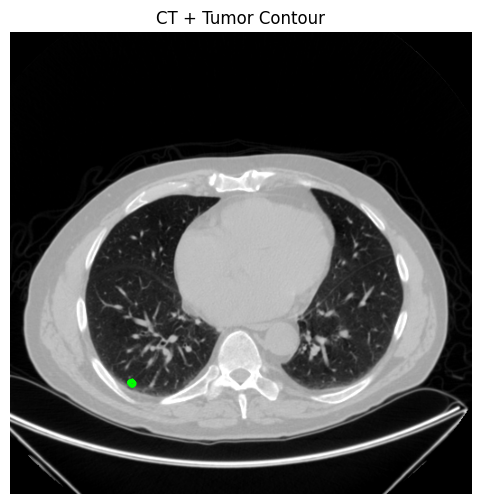

In [57]:
plt.figure(figsize=(6,6))
plt.imshow(img, cmap="gray")
plt.contour(mask[90], colors="lime", linewidths=2)
plt.title("CT + Tumor Contour")
plt.axis("off")
plt.show()


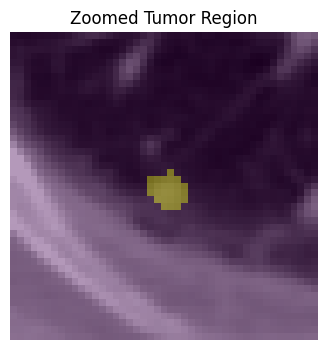

In [58]:
ys, xs = np.where(mask[90] > 0)

ymin, ymax = ys.min()-20, ys.max()+20
xmin, xmax = xs.min()-20, xs.max()+20

plt.figure(figsize=(4,4))
plt.imshow(img[ymin:ymax, xmin:xmax], cmap="gray")
plt.imshow(mask[90][ymin:ymax, xmin:xmax], alpha=0.4)
plt.title("Zoomed Tumor Region")
plt.axis("off")
plt.show()


In [35]:
print("Tumor pixels in slice 90:", mask[90].sum())


Tumor pixels in slice 90: 26


In [46]:
from pathlib import Path

print(Path("../data/annotations/LIDC-IDRI-0005.json").exists())

True


In [47]:
import json

ann = json.load(open("../data/annotations/LIDC-IDRI-0005.json"))

print(ann.keys())


dict_keys(['patient_id', 'series_instance_uid', 'nodules'])


In [48]:
print("Patient:", ann["patient_id"])
print("Series UID:", ann["series_instance_uid"])
print("Number of nodules:", len(ann["nodules"]))

total_slices = sum(len(n["slices"]) for n in ann["nodules"])
print("Total annotated slices:", total_slices)

Patient: LIDC-IDRI-0005
Series UID: 1.3.6.1.4.1.14519.5.2.1.6279.6001.447468612991222399440694673357
Number of nodules: 1
Total annotated slices: 2


In [49]:
n = ann["nodules"][0]
s = n["slices"][0]

print(s.keys())


dict_keys(['sop_uid', 'z_position', 'contour'])


In [50]:
print(len(s["contour"]))  # should be >= 3


20


In [45]:
import numpy as np
mask = np.load("../data/masks/LIDC-IDRI-0005_mask.npy")

print(mask.shape)
print(mask.sum())
print(np.where(mask.sum(axis=(1,2)) > 0)[0][:10])


(124, 512, 512)
121
[83 84]


In [ ]:
import numpy as np

mask = np.load("../data/masks/LIDC-IDRI-0005_mask.npy")

slice_indices = np.where(mask.sum(axis=(1,2)) > 0)[0]
print("Slices with tumor:", slice_indices[:20])
print("Total tumor slices:", len(slice_indices))

Slices with tumor: [83 84]
Total tumor slices: 2


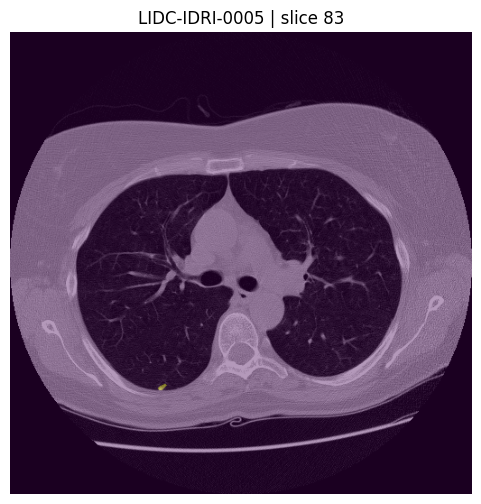

In [61]:
from src.dataset import LungCTDataset
from pathlib import Path
import matplotlib.pyplot as plt

series_dir = Path(
    "../data/raw/LIDC-IDRI-0005/"
    "1.3.6.1.4.1.14519.5.2.1.6279.6001.447468612991222399440694673357"
)

dataset = LungCTDataset(series_dir)

idx = slice_indices[0]  # FIRST tumor slice

img = dataset.get_slice(idx)

plt.figure(figsize=(6,6))
plt.imshow(img, cmap="gray")
plt.imshow(mask[idx], alpha=0.4)
plt.title(f"LIDC-IDRI-0005 | slice {idx}")
plt.axis("off")
plt.show()
